In [15]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
#from sklearn.externals import joblib

In [10]:
import numpy as np # linear algebra  
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
#run following commands to install librosa module for anaconda for first time
#conda install -c numba numba
#conda install -c conda-forge librosa
import librosa # to extract speech features
import librosa.display #to display audio as wave plot, spectrogram, or colormap
import wave # read and write WAV files
#run following commands to install soundfile module for anaconda for first time
#conda install -c conda-forge pysoundfile
import soundfile
import matplotlib.pyplot as plt # to generate the visualizations
import random # to shuffle the train and test data
import glob
# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.model_selection import cross_val_score

In [11]:
f_x=open('x.npy','rb')
x=np.load(f_x)
f_y=open('y.npy','rb')
y=np.load(f_y)

In [12]:
x = np.asarray(f_x)
y = np.asarray(f_y)


x.shape, y.shape

((), ())

In [13]:
emotions_CNN = {"neutral":"00" ,
            "calm":"01",
            "happy":"02",
            "sad":"03",
            "angry":"04" ,
            "fearful":"05" ,
            "disgust":"06",
            "surprised":"07"}

In [14]:
for i in range(len(y)):
    y[i]=emotions_CNN[y[i]]

TypeError: len() of unsized object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)
x_train_cnn.shape, x_test_cnn.shape

In [22]:
model = Sequential()

model.add(Conv1D(64, 5,padding='same',input_shape=(52,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 52, 64)            384       
_________________________________________________________________
activation_13 (Activation)   (None, 52, 64)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 52, 64)            0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 13, 128)           41088     
_________________________________________________________________
activation_14 (Activation)   (None, 13, 128)           0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 128)          

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [25]:
cnn_history=model.fit(x_train_cnn, y_train, batch_size=16, epochs=200, validation_data=(x_test_cnn, y_test))

Train on 3392 samples, validate on 848 samples
Epoch 1/200
3392/3392 [==============================] - 4s 1ms/step - loss: 3.3043 - accuracy: 0.2465 - val_loss: 1.4977 - val_accuracy: 0.4422
Epoch 2/200
3392/3392 [==============================] - 3s 962us/step - loss: 2.0289 - accuracy: 0.4136 - val_loss: 1.3627 - val_accuracy: 0.6073
Epoch 3/200
3392/3392 [==============================] - 4s 1ms/step - loss: 1.5327 - accuracy: 0.5195 - val_loss: 0.9502 - val_accuracy: 0.6910
Epoch 4/200
3392/3392 [==============================] - 4s 1ms/step - loss: 1.3464 - accuracy: 0.5710 - val_loss: 0.9207 - val_accuracy: 0.7311
Epoch 5/200
3392/3392 [==============================] - 4s 1ms/step - loss: 1.2176 - accuracy: 0.6091 - val_loss: 0.8955 - val_accuracy: 0.7158
Epoch 6/200
3392/3392 [==============================] - 3s 785us/step - loss: 1.0980 - accuracy: 0.6498 - val_loss: 0.8466 - val_accuracy: 0.7017
Epoch 7/200
3392/3392 [==============================] - 3s 883us/step - loss: 

3392/3392 [==============================] - 3s 1ms/step - loss: 0.3730 - accuracy: 0.8650 - val_loss: 0.4219 - val_accuracy: 0.8550
Epoch 112/200
3392/3392 [==============================] - 5s 1ms/step - loss: 0.3609 - accuracy: 0.8676 - val_loss: 0.4444 - val_accuracy: 0.8491
Epoch 113/200
3392/3392 [==============================] - 5s 1ms/step - loss: 0.3564 - accuracy: 0.8688 - val_loss: 0.4054 - val_accuracy: 0.8585
Epoch 114/200
3392/3392 [==============================] - 4s 1ms/step - loss: 0.3591 - accuracy: 0.8665 - val_loss: 0.4205 - val_accuracy: 0.8467
Epoch 115/200
3392/3392 [==============================] - 3s 919us/step - loss: 0.3557 - accuracy: 0.8726 - val_loss: 0.4082 - val_accuracy: 0.8550
Epoch 116/200
3392/3392 [==============================] - 3s 755us/step - loss: 0.3636 - accuracy: 0.8697 - val_loss: 0.4193 - val_accuracy: 0.8502
Epoch 117/200
3392/3392 [==============================] - 2s 702us/step - loss: 0.3451 - accuracy: 0.8756 - val_loss: 0.4299 - 

In [ ]:
predictions = model.predict_classes(x_testcnn)

new_Ytest = y_test.astype(int)

from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

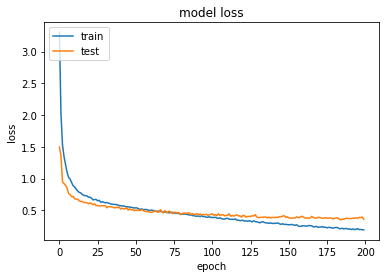

In [27]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

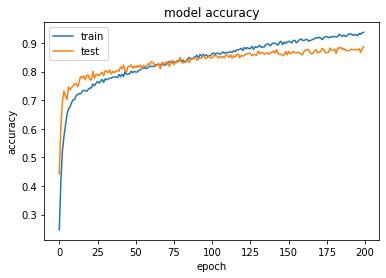

In [28]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
joblib.dump(model, 'cnn_model.pkl') 
print("MODEL SAVED")

NameError: name 'joblib' is not defined